# The Problem:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Answer the following questions:

1) Who were the passengers on the Titanic? (Ages, Gender, Class, ..., etc)  

2) What deck were the passengers on and how does that relate to their class?  

3) Where did the passengers come from?  

4) Who was alone and who was with family?  

5) What factors helped someone survive the sinking?

# The Data:

In [131]:
# Open the file using pandas
import pandas as pd
from pandas import Series, DataFrame

In [132]:
# Setup the training dataset as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [133]:
# Preview the data
titanic_df.head()
# Survived - 0=died, 1=survived
# Pclass - Passenger class; 1st, 2nd, 3rd
# SibSp - Siblings on board; 0=no siblings on board, 1=siblings on board
# Parch - Parents or children. Did they have a parent or child on board
# Cabin - First letter of cabin is the deck; Deck A, B, C, etc.
# Embarked - Initials of cities

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
titanic_df.info()
# 891 passengers
# Missing a lot of info from the cabin column; only 204 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 1) Who were the passengers on the Titanic?

In [135]:
# Import what's needed for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

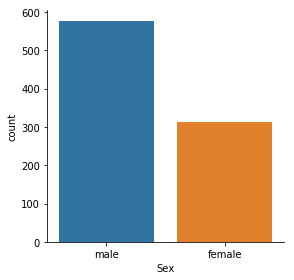

In [136]:
# Let's first check gender
sns.factorplot('Sex', data=titanic_df, kind="count")

We notice that there are nearly twice as many males as females.

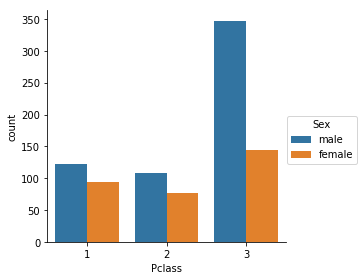

In [137]:
# Doing the opposite now:
sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind="count")
# Sex was pretty equal amongst the first 2 classes, greater differences in 3rd class

We learn that there are more males in the 3rd class than females. It might be useful to know the split between males, females, and children.

Let's consider children. As the saying goes, "Women and children first." Maybe this affected survival rates. We are defining a child as person under the age of 16.

In [138]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    # If the person is over 16, we take their sex.

In [139]:
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [140]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


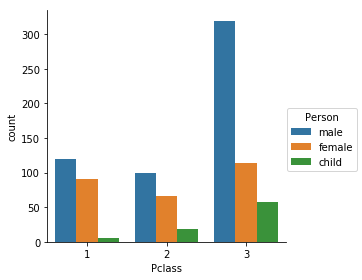

In [141]:
sns.factorplot('Pclass', data=titanic_df, hue='Person', kind="count")
# Not many children in first and second class; many in third. Contrary to the belief that there would be pampered children in first class.

There are quite a bit of children in 3rd class but not so many in 1st. Let's create a distribution of the ages to get a more precise picture of who the passengers were.

Let's create a histogram.

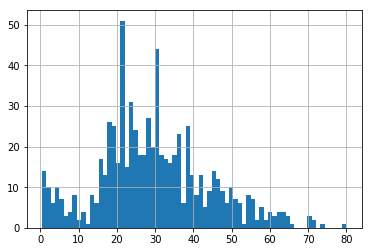

In [142]:
titanic_df['Age'].hist(bins=70)
# Many young children, then a normal distribution after age 10.

Let's get a quick overall comparison of males, females, and children.

In [143]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Let's take a look of the age distributions by genders.

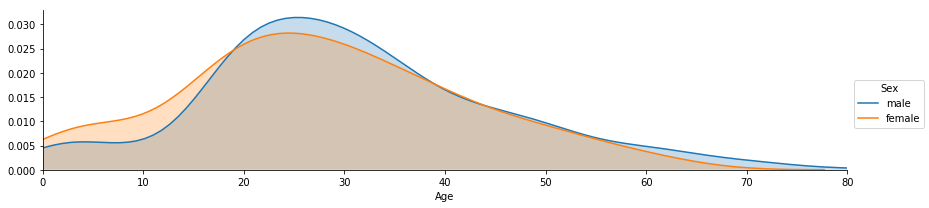

In [144]:
# Creating a facet grid with seaborn.
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Let's recreate the same facet grid but with children as well.

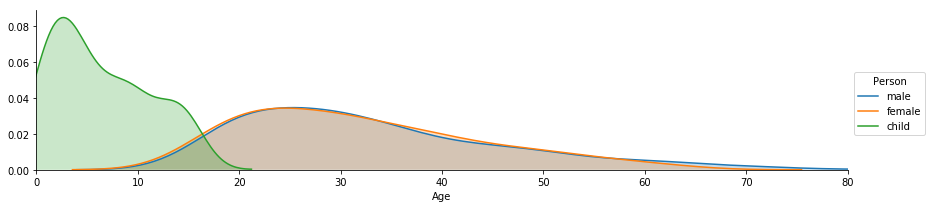

In [145]:
fig = sns.FacetGrid(titanic_df, hue="Person", aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()
# Since this is a KDE plot, the child distribution includes values past 16 since KDE is dependent on bandwidth.

Let's split the age distribution by the passenger classes now.

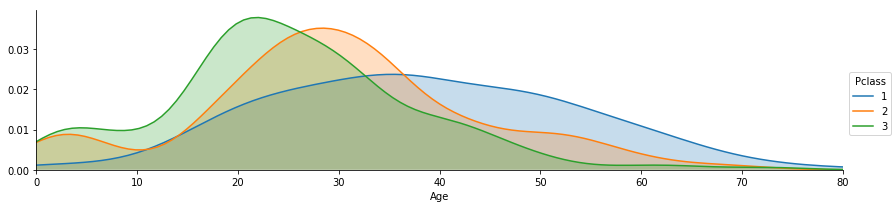

In [146]:
# Creating a facet grid with seaborn. Hue is now passenger class.
fig = sns.FacetGrid(titanic_df, hue="Pclass", aspect=4)

fig.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()
# First class has an obvious normal distribution, but the 2nd and 3rd classes are skewed toward the 20-30 age range. 

We now have a good idea of who the passengers were based on sex, age, and class.

# 2) What deck were the passengers on and how does that relate to their class?

In [147]:
# Taking a look at the dataset again.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We see that the Cabin column has several null values, so we'll drop them.

In [148]:
deck = titanic_df['Cabin'].dropna()

In [149]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only need the first letter of the deck to classify its level (e.g. A, B, C, ... G)

Let's simplify the Cabin column

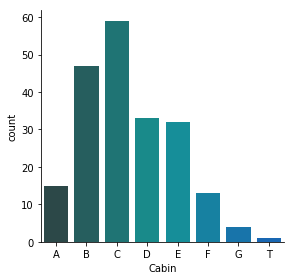

In [150]:
# Using a for-loop:

levels = []

for level in deck:
    levels.append(level[0]) # Append the first char of each string
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df, palette='winter_d', kind='count', order=['A','B','C','D','E','F','G','T'])

The 'T' deck is an anomaly. Let's remove the outlier.

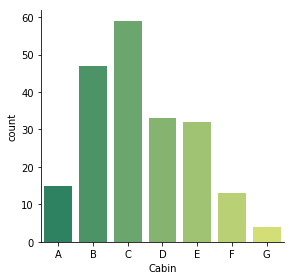

In [151]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df, palette='summer', kind="count", order=['A','B','C','D','E','F','G'])

# 3) Where did the passengers come from?

In [152]:
titanic_df.head()
# Embarked - Where the passenger came from. C = Cherbourg, Q = Queenstown, S = South Hampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


For the 'Embarked' column, the values (C, Q, S) = (Cherbourg, Queenstown, Southhampton). 

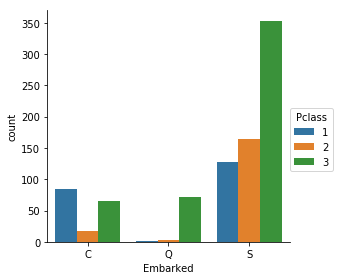

In [153]:
sns.factorplot('Embarked', data=titanic_df, hue='Pclass', kind='count', order=['C','Q','S'])
# Seeing the class distripution for each city.
# In Queenstown, many passengers were third class. As an analyst, we should think about the economics of the town in the period.
# Same for Cherbourg where many people were first class.

In Queenstown, almost all the passengers that boarded there were in 3rd class. It would be interesting to look at the economics of that town in that time period for further investigation.

# 4) Who was alone and who was with family?

Let's make a column to simplify who was alone. If SibSP and Parch are 0, the passenger was alone.

In [154]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']
# If the Alone column is not 0, the passenger had family onboard.

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

We know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone.

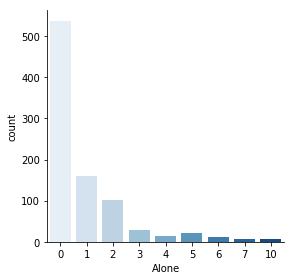

In [155]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')
# Many people were alone.


# 5) What factors helped someone survive the sinking?

Let's start by getting a quicki overall view of survived vs. died.

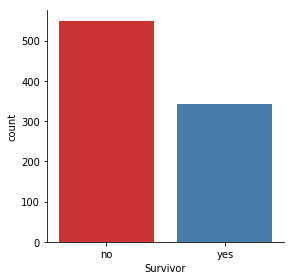

In [156]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor', data=titanic_df, palette='Set1', kind='count')

Quite a few more people died than those who survived. Let's see if the class of the passenger had an effect on their survival rate, since the movie Titanic popularized the notion than the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

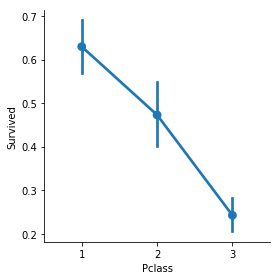

In [157]:
sns.factorplot('Pclass', 'Survived', data=titanic_df)
# Passengers in the third class had significantly lower rates of survival.
# Third class also had many males.

Looks like survival rates for the 3rd class are substantially lower. However, this effect could be caused by the large amount of men in the 3rd class in combination with the "women and children first" policy.

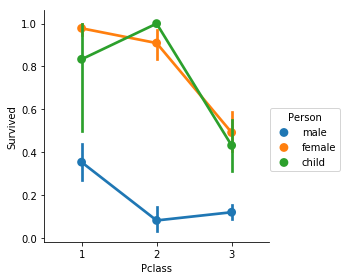

In [158]:
# Let's consider class and gender.
sns.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df)
# Being male, regardless of class, lowered survival. Being in third class also lowered survival.

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Regardless of class, being a male dramatically decreased your chance of survival.

Let's check the effect of age now.

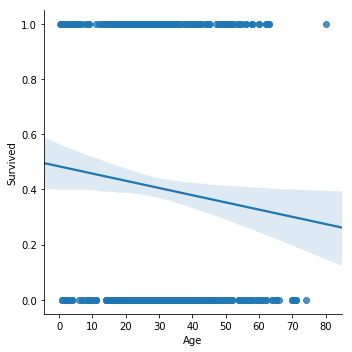

In [159]:
sns.lmplot('Age', 'Survived', data=titanic_df)
# The 1's are people that survived, 0's are people that died. Corresponding age along x-axis.
# The trend is that the older the passenger was, the greater chance they died.

There is a general trend that the older the passenger was, the less likely they survived. 

Let's see the effect of age by class.

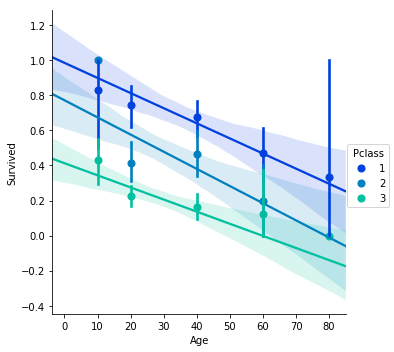

In [160]:
generations = [10, 20, 40, 60, 80] # Bins for grid standard deviations.

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)
# Greater standard deviation on older people in first class.

We find a significantly greater standard deviation on the old people in first class.

Let's explore the effect of age by gender.

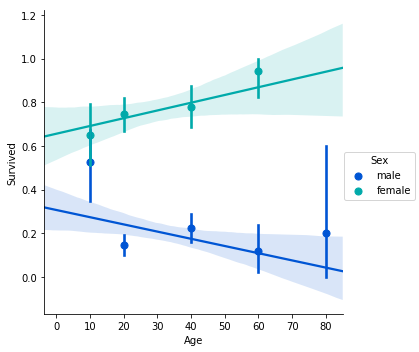

In [161]:
# Exploring effect of age and gender on survival.
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)
# If you were an older female, you had a better chance at surviving than if you were an older male. Still greater standard deviation for old males.

Males had a greater chance of surival if they were younger. Females had a greater chance of survival if they were older.

C:\Users\jeson\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


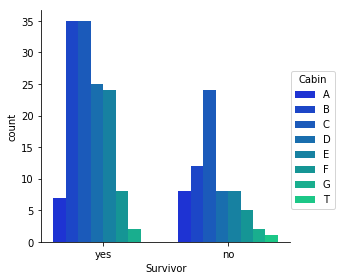

In [162]:
# Further questions:
# Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
titanic_cab = titanic_df.dropna(subset=['Cabin'])

temp = []

for cabin in titanic_cab['Cabin']:
    temp.append(cabin[0])

temp

titanic_cab['Cabin'] = temp

titanic_cab.head()

sns.factorplot('Survivor', hue='Cabin', data=titanic_cab, palette='winter', kind='count', hue_order=['A','B','C','D','E','F','G','T'])

It seems that the higher cabins, B-E had higher chances of survival than the lower ones. It would be interesting to investigate the significantly lower survival rate of those in Cabin A.

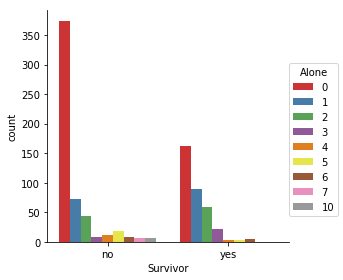

In [163]:
# Did having a family member increase the odds of surviving the crash?
sns.factorplot('Survivor', hue='Alone', data=titanic_df, palette='Set1', kind='count')

Those who were alone had a significantly lower chance at survival.